<a href="https://colab.research.google.com/github/GVSU-CIS635/gvsu-cis635-term-project-ks/blob/main/Final_Project_CIS_635.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Loading and Preliminary Inspection

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/NIJ2016_JAN01_JUL31.xlsx'
crime_data = pd.read_excel(file_path)

# Preliminary inspection
print("First 5 Rows of the Dataset:")
print(crime_data.head())

print("\nDataset Summary:")
print(crime_data.describe())

print("\nMissing Values in Each Column:")
print(crime_data.isnull().sum())


First 5 Rows of the Dataset:
        CATEGORY CALL GROUPS final_case_type  \
0  STREET CRIMES    DISORDER          DISTP    
1  STREET CRIMES    DISORDER          DISTP    
2  STREET CRIMES    DISORDER          DISTP    
3  STREET CRIMES    DISORDER          DISTP    
4  STREET CRIMES    DISORDER          DISTP    

                                           CASE DESC   occ_date  x_coordinate  \
0  DISTURBANCE - PRIORITY                        ... 2016-01-01       7624068   
1  DISTURBANCE - PRIORITY                        ... 2016-01-01       7629461   
2  DISTURBANCE - PRIORITY                        ... 2016-01-01       7631377   
3  DISTURBANCE - PRIORITY                        ... 2016-01-01       7637471   
4  DISTURBANCE - PRIORITY                        ... 2016-01-01       7637471   

   y_coordinate  census_tract  
0        710192        4200.0  
1        656559        6404.0  
2        667480        6601.0  
3        668402        6702.0  
4        668402        6702.0  

Da

### Data Cleaning and Outlier Handling

In [3]:
from scipy import stats
import numpy as np

# Drop duplicates
crime_data_cleaned = crime_data.drop_duplicates()

# Handle missing values safely
for column in crime_data_cleaned.columns:
    if crime_data_cleaned[column].dtype == 'object':
        # Fill missing values in categorical columns with mode
        mode_value = crime_data_cleaned[column].mode()[0]
        crime_data_cleaned.loc[crime_data_cleaned[column].isnull(), column] = mode_value
    else:
        # Fill missing values in numerical columns with median
        median_value = crime_data_cleaned[column].median()
        crime_data_cleaned.loc[crime_data_cleaned[column].isnull(), column] = median_value

# Handling outliers for a sample numerical column
z_scores = np.abs(stats.zscore(crime_data_cleaned['x_coordinate']))
crime_data_cleaned = crime_data_cleaned[(z_scores < 3)]

print("Data after Cleaning:")
print(crime_data_cleaned.head())




Data after Cleaning:
        CATEGORY CALL GROUPS final_case_type  \
0  STREET CRIMES    DISORDER          DISTP    
1  STREET CRIMES    DISORDER          DISTP    
2  STREET CRIMES    DISORDER          DISTP    
3  STREET CRIMES    DISORDER          DISTP    
5  STREET CRIMES    DISORDER          DISTP    

                                           CASE DESC   occ_date  x_coordinate  \
0  DISTURBANCE - PRIORITY                        ... 2016-01-01       7624068   
1  DISTURBANCE - PRIORITY                        ... 2016-01-01       7629461   
2  DISTURBANCE - PRIORITY                        ... 2016-01-01       7631377   
3  DISTURBANCE - PRIORITY                        ... 2016-01-01       7637471   
5  DISTURBANCE - PRIORITY                        ... 2016-01-01       7638508   

   y_coordinate  census_tract  
0        710192        4200.0  
1        656559        6404.0  
2        667480        6601.0  
3        668402        6702.0  
5        663772        6602.0  


### Data Imputation and Feature Engineering

In [4]:
# Handling missing values by filling them with a default value (e.g., -1 to indicate unknown)
crime_data['census_tract'].fillna(-1, inplace=True)

# Feature Engineering
# Categorizing crime types: Already categorized in 'final_case_type', 'CATEGORY', and 'CALL GROUPS'
# Extracting time components from 'occ_date'
crime_data['day_of_week'] = crime_data['occ_date'].dt.day_name()
crime_data['month'] = crime_data['occ_date'].dt.month
crime_data['year'] = crime_data['occ_date'].dt.year
crime_data['hour'] = crime_data['occ_date'].dt.hour

# Adding geographical sectors based on the coordinates (simple division into quadrants for demonstration)
median_x = crime_data['x_coordinate'].median()
median_y = crime_data['y_coordinate'].median()

def assign_sector(x, y, median_x, median_y):
    if x < median_x and y < median_y:
        return 'Southwest'
    elif x >= median_x and y < median_y:
        return 'Southeast'
    elif x < median_x and y >= median_y:
        return 'Northwest'
    else:
        return 'Northeast'

crime_data['sector'] = crime_data.apply(lambda row: assign_sector(row['x_coordinate'], row['y_coordinate'], median_x, median_y), axis=1)

# Displaying the modified dataset with new features
crime_data.head()


,CATEGORY,CALL GROUPS,final_case_type,CASE DESC,occ_date,x_coordinate,y_coordinate,census_tract,day_of_week,month,year,hour,sector
0,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2016-01-01,7624068,710192,4200.0,Friday,1,2016,0,Northwest
1,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2016-01-01,7629461,656559,6404.0,Friday,1,2016,0,Southwest
2,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2016-01-01,7631377,667480,6601.0,Friday,1,2016,0,Southwest
3,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2016-01-01,7637471,668402,6702.0,Friday,1,2016,0,Southwest
4,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2016-01-01,7637471,668402,6702.0,Friday,1,2016,0,Southwest


### Exploratory Data Analysis (EDA) and Data Visualization

,x_coordinate,y_coordinate,census_tract,month,year,hour
count,1.204660e+05,120466.000000,120466.000000,120466.000000,120466.0,120466.0
mean,7.657740e+06,684471.227409,6052.458262,4.126691,2016.0,0.0
std,1.703542e+04,12309.359292,32192.546292,1.998668,0.0,0.0
min,7.596281e+06,632104.000000,-1.000000,1.000000,2016.0,0.0
25%,7.644019e+06,676295.000000,2100.000000,2.000000,2016.0,0.0
50%,7.654521e+06,683702.000000,4800.000000,4.000000,2016.0,0.0
75%,7.671909e+06,690385.750000,8201.000000,6.000000,2016.0,0.0
max,7.762614e+06,732630.000000,980000.000000,7.000000,2016.0,0.0


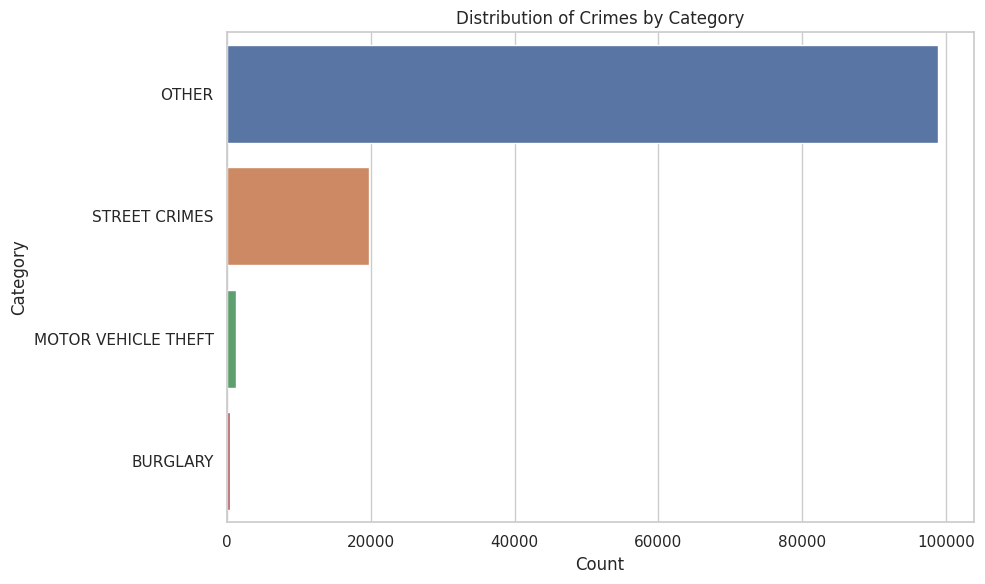

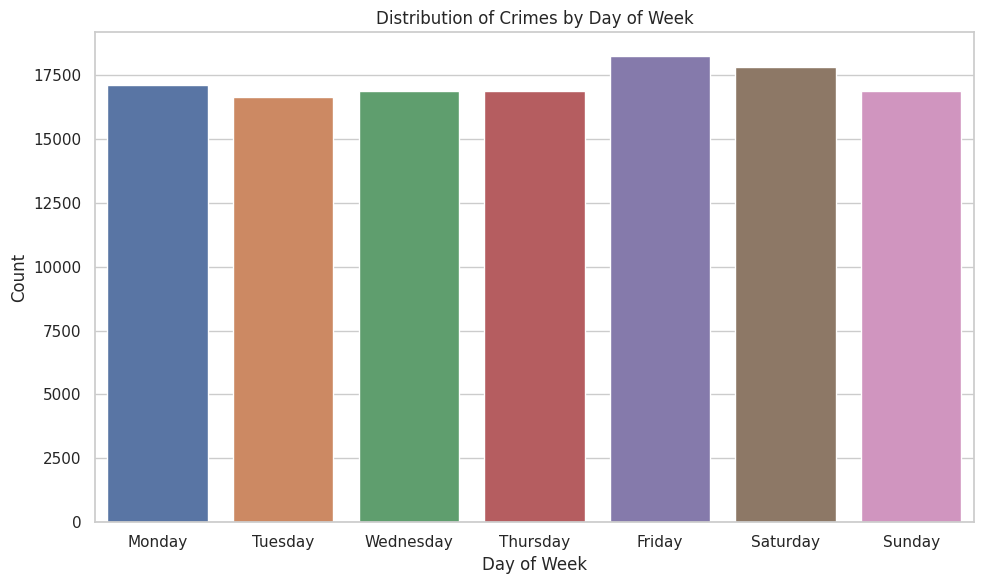

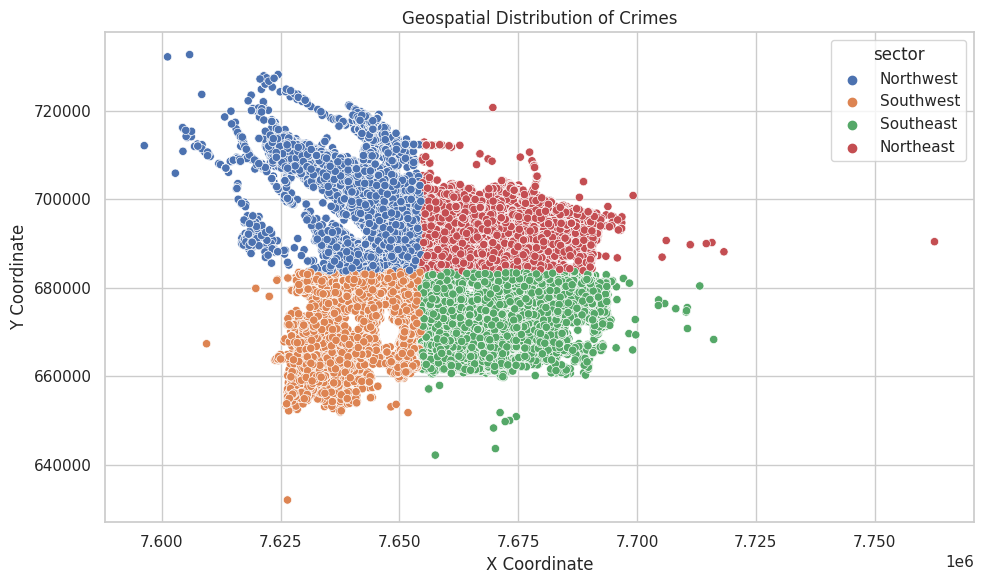

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualisation style
sns.set(style="whitegrid")

# Exploratory Data Analysis (EDA)

# Summary Statistics
summary_statistics = crime_data.describe()

# Visualizations
# Distribution of Crimes by Category
plt.figure(figsize=(10, 6))
sns.countplot(y='CATEGORY', data=crime_data, order = crime_data['CATEGORY'].value_counts().index)
plt.title('Distribution of Crimes by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()

# Distribution of Crimes by Day of Week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=crime_data, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Crimes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.tight_layout()

# Geospatial Distribution of Crimes (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='sector', data=crime_data)
plt.title('Geospatial Distribution of Crimes')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.tight_layout()

# Display summary statistics
summary_statistics



### Geospatial and Temporal Analysis

<Figure size 1200x1000 with 0 Axes>

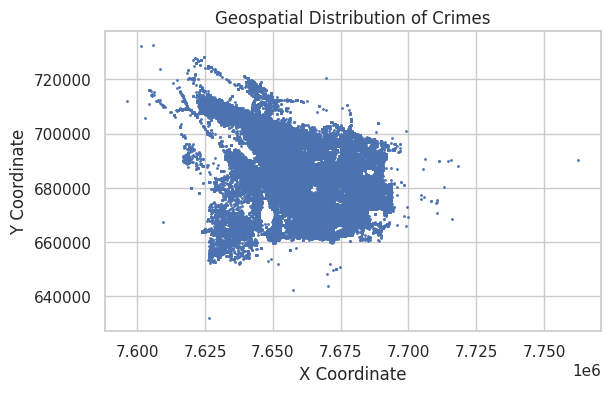

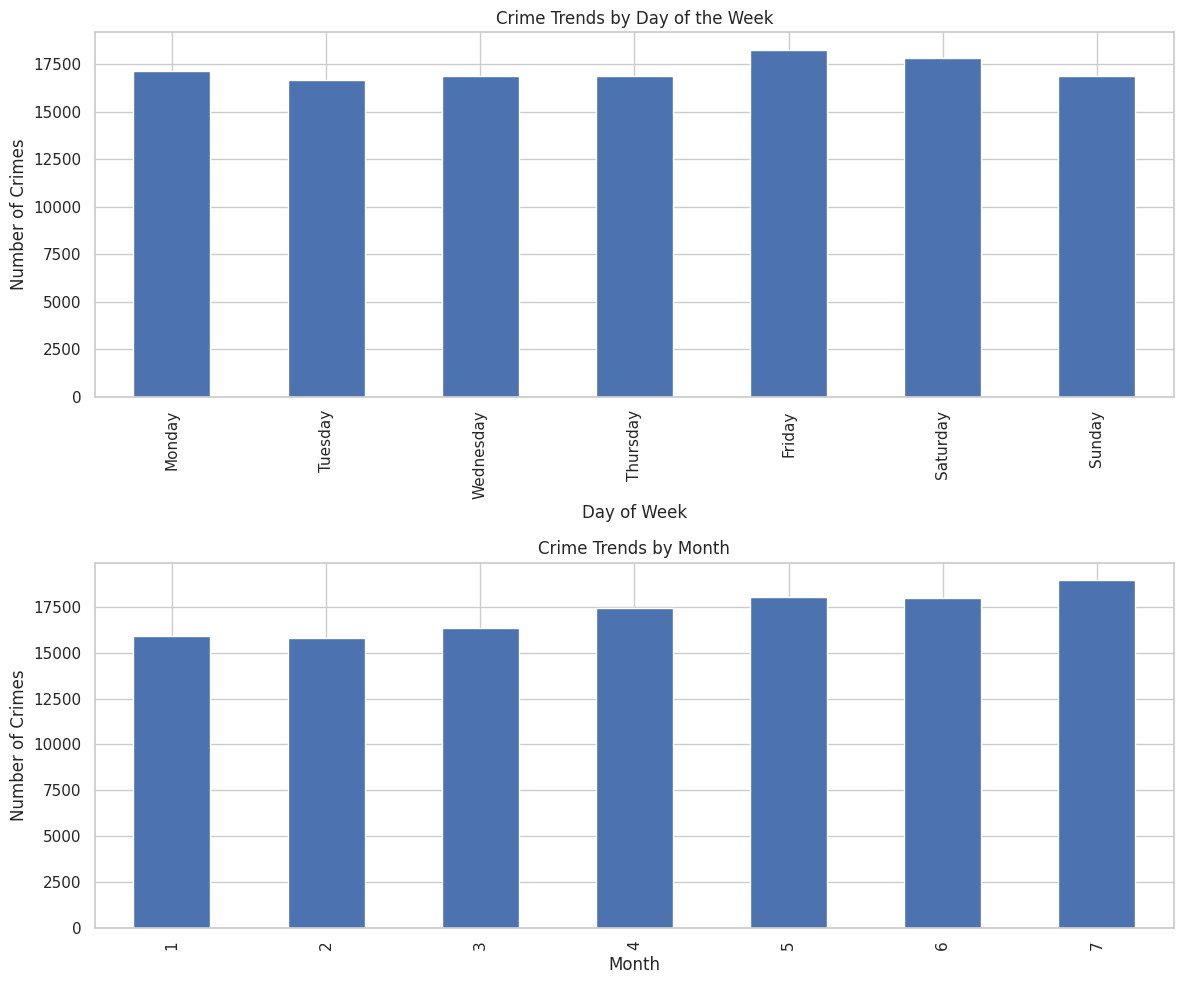

In [8]:
import geopandas as gpd
from shapely.geometry import Point

# Creating a GeoDataFrame for geospatial analysis
gdf = gpd.GeoDataFrame(
    crime_data, geometry=gpd.points_from_xy(crime_data.x_coordinate, crime_data.y_coordinate))

# Plotting the geospatial distribution of crimes
plt.figure(figsize=(12, 10))
gdf.plot(markersize=1)
plt.title('Geospatial Distribution of Crimes')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Temporal Analysis - Trends over days and months
# Trend over days of the week
day_of_week_trend = crime_data['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Trend over months
month_trend = crime_data['month'].value_counts().sort_index()

# Plotting temporal trends
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Day of Week Trend
day_of_week_trend.plot(kind='bar', ax=axes[0])
axes[0].set_title('Crime Trends by Day of the Week')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Number of Crimes')

# Month Trend
month_trend.plot(kind='bar', ax=axes[1])
axes[1].set_title('Crime Trends by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Crimes')

plt.tight_layout()
plt.show()



### Feature Engineering and Data Visualization

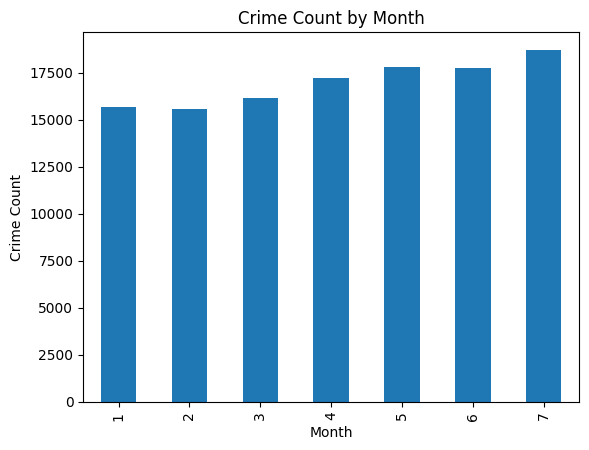

<ipython-input-5-10a489df2280>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crime_data_cleaned.corr(), annot=True, cmap='coolwarm')


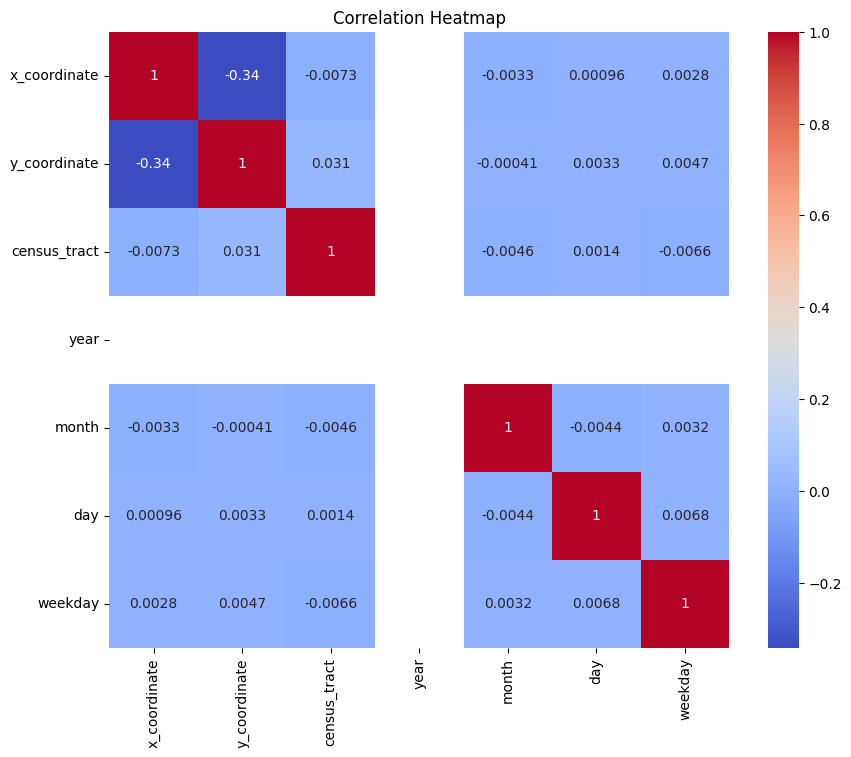

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering: Extracting date features
crime_data_cleaned['year'] = crime_data_cleaned['occ_date'].dt.year
crime_data_cleaned['month'] = crime_data_cleaned['occ_date'].dt.month
crime_data_cleaned['day'] = crime_data_cleaned['occ_date'].dt.day
crime_data_cleaned['weekday'] = crime_data_cleaned['occ_date'].dt.weekday

# Visualization: Crime Count by Month
crime_data_cleaned['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Crime Count by Month')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.show()

# Visualization: Heatmap of Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(crime_data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Label Encoding of Categorical Data

In [ ]:
# Convert the column to string data type
crime_data['final_case_type'] = crime_data['final_case_type'].astype(str)


In [ ]:
# Now apply label encoding
label_encoder = LabelEncoder()
crime_data['final_case_type_encoded'] = label_encoder.fit_transform(crime_data['final_case_type'])


### Data Preprocessing and Decision Tree Classification

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Convert 'final_case_type' to string
crime_data['final_case_type'] = crime_data['final_case_type'].astype(str)

# Encode categorical variables
categorical_columns = ['CATEGORY', 'CALL GROUPS']  # Add other categorical columns as needed
label_encoder = LabelEncoder()
for column in categorical_columns:
    crime_data[column] = label_encoder.fit_transform(crime_data[column])

# Encode the target variable
crime_data['final_case_type_encoded'] = label_encoder.fit_transform(crime_data['final_case_type'])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['x_coordinate', 'y_coordinate']  # Add other numerical columns as needed
crime_data[numerical_columns] = scaler.fit_transform(crime_data[numerical_columns])

# Select features and target variable
features = ['CATEGORY', 'CALL GROUPS']  # Adjust the list as needed
target = 'final_case_type_encoded'
X = crime_data[features]
y = crime_data[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = dt_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


<ipython-input-21-fc9cf96c1675>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['final_case_type'] = crime_data['final_case_type'].astype(str)
<ipython-input-21-fc9cf96c1675>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data[column] = label_encoder.fit_transform(crime_data[column])
<ipython-input-21-fc9cf96c1675>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Accuracy: 0.47917628057221967
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00       708
           2       0.00      0.00      0.00       332
           3       0.00      0.00      0.00       395
           4       0.27      1.00      0.43       879
           5       0.00      0.00      0.00       115
           6       0.00      0.00      0.00        98
           7       0.00      0.00      0.00        81
           8       0.00      0.00      0.00      1067
           9       0.00      0.00      0.00       900
          10       0.88      1.00      0.94       377
          11       0.42      1.00      0.59       611
          12       0.00      0.00      0.00        24
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00       583
          15       1.00      1.00      1.00       106
          16       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model Training and Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [ ]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Model: Logistic Regression
Accuracy: 0.47917628057221967
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00       708
           2       0.00      0.00      0.00       332
           3       0.00      0.00      0.00       395
           4       0.27      1.00      0.43       879
           5       0.00      0.00      0.00       115
           6       0.00      0.00      0.00        98
           7       0.00      0.00      0.00        81
           8       0.00      0.00      0.00      1067
           9       0.00      0.00      0.00       900
          10       0.88      1.00      0.94       377
          11       0.42      1.00      0.59       611
          12       0.00      0.00      0.00        24
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00       583
          15       1.00      1.00      1.00       106
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Gradient Boosting
Accuracy: 0.47917628057221967
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00       708
           2       0.00      0.00      0.00       332
           3       0.00      0.00      0.00       395
           4       0.27      1.00      0.43       879
           5       0.00      0.00      0.00       115
           6       0.00      0.00      0.00        98
           7       0.00      0.00      0.00        81
           8       0.00      0.00      0.00      1067
           9       0.00      0.00      0.00       900
          10       0.88      1.00      0.94       377
          11       0.42      1.00      0.59       611
          12       0.00      0.00      0.00        24
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00       583
          15       1.00      1.00      1.00       106
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
